### Лабораторна робота №8
#### Виконав: Студент групи КН-24-1 Соломка Борис Олегович

## Структура даних граф. Алгоритми на графах

## Вступ

**Тема:** Структура даних граф. Алгоритми на графах

**Мета:** засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

## Хід роботи

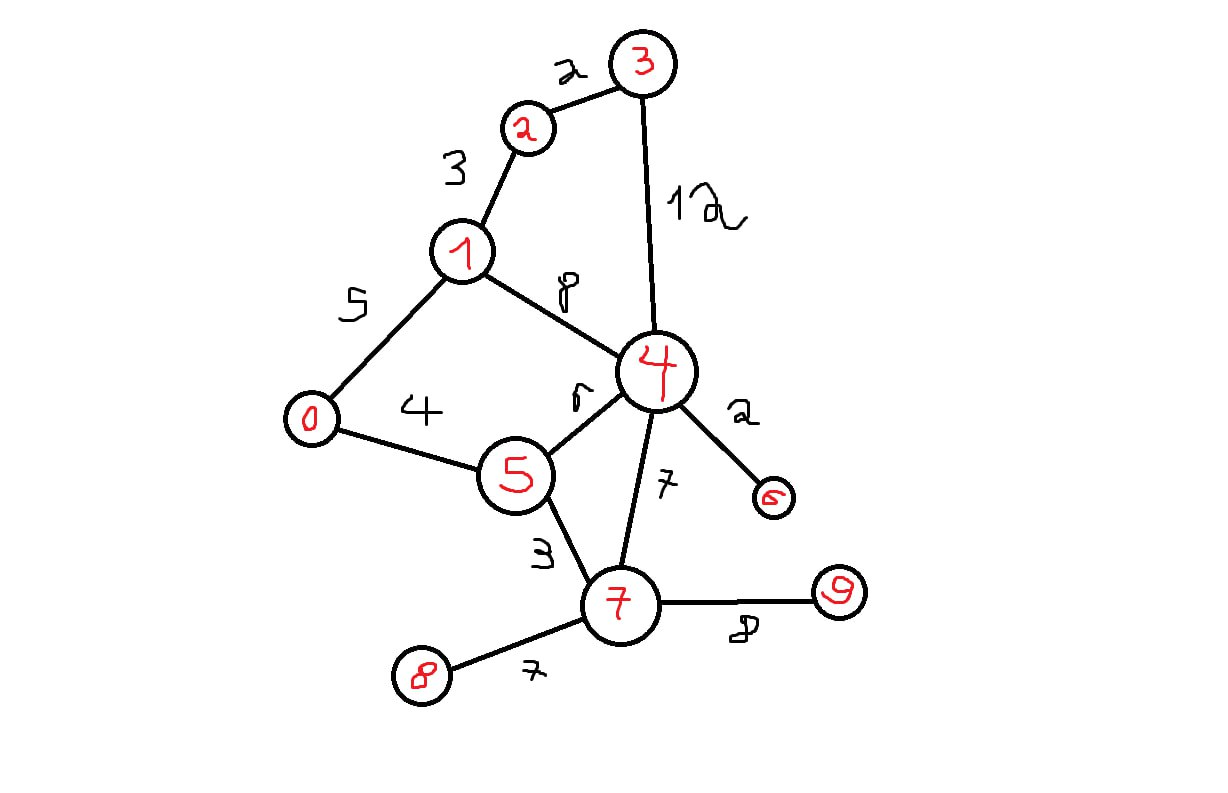

Подальші дії будуть виконуватись на поданому графі. Граф оснований на транспортній мережі Донецької області.

### 1. Налаштування середовища

In [1]:
# Імпортуємо необхідні бібліотеки
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Реалізація структури даних граф

In [2]:
class Vertex:
    def __init__(self, key):
        # Конструктор класу Vertex
        self.id = key # Ідентифікатор вершини
        self.connectedTo = {} # Сусіди вершини та їх ваги
        
    def addNeighbor(self, nbr, weight=0):
        # Додає зв'язок між поточною вершиною та сусідньою вершиною
        self.connectedTo[nbr] = weight
        
    def __str__(self):
        # Представлення вершини у вигляді рядка
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])
    
    def getConnections(self):
        # Повертає сусідні вершини поточної вершини
        return self.connectedTo.keys()
    
    def getId(self):
        # Повертає ідентифікатор поточної вершини
        return self.id
    
    def getWeight(self, nbr):
        # Повертає вагу ребра між поточною вершиною та заданою сусідньою вершиною
        return self.connectedTo[nbr]

In [3]:
class Graph:
    def __init__(self):
        # Ініціалізація порожнього словника, що відображає імена вершин на об'єкти Vertex
        self.vertList = {}
        # Ініціалізація лічильника вершин у графі
        self.numVertices = 0
        
    def addVertex(self, key):
        # Збільшення лічильника вершин та створення нового об'єкта Vertex
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        # Додавання нової вершини до словника
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self, n):
        # Повертає об'єкт Vertex за його ім'ям
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
            
    def __contains__(self, n):
        # Перевіряє, чи міститься вершина з заданим ім'ям у графі
        return n in self.vertList
    
    def addEdge(self, f, t, cost=0):
        # Додає зв'язок між вершинами з іменами f та t з вагою cost
        if f not in self.vertList:
            # Якщо вершини f ще немає у графі, додаємо її
            nv = self.addVertex(f)
        if t not in self.vertList:
            # Якщо вершини t ще немає у графі, додаємо її
            nv = self.addVertex(t)
        # Додаємо зв'язок між вершинами f та t з вагою cost
        self.vertList[f].addNeighbor(self.vertList[t], cost)
        
    def getVertices(self):
        # Повертає список імен усіх вершин у графі
        return self.vertList.keys()
    
    def __iter__(self):
        # Повертає ітератор, який дозволяє ітерувати по об'єктах Vertex у графі
        return iter(self.vertList.values())

### 3. Створення та візуалізація заданого графа

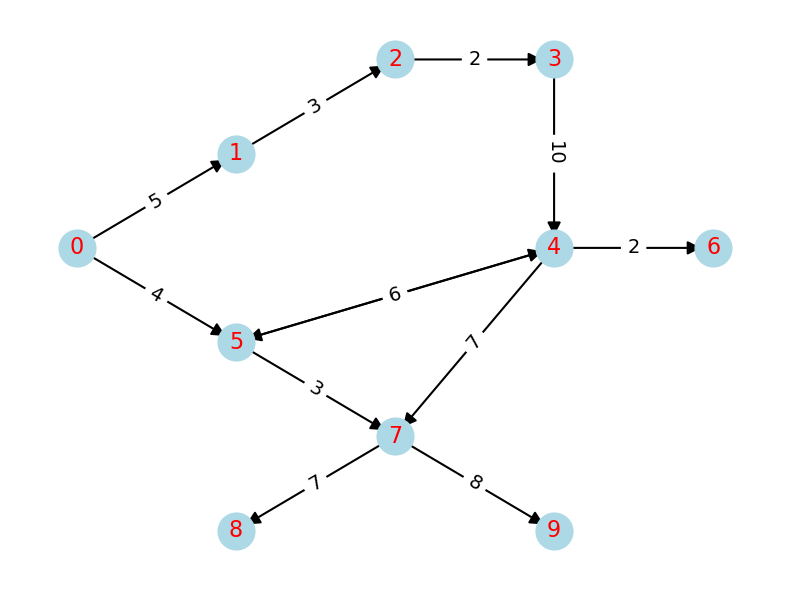

In [4]:
# Створення графа з зображення
G = nx.DiGraph()

# Додавання вершин (0-9)
for i in range(10):
    G.add_node(i)

# Додавання ребер з вагами відповідно до зображення
edges_with_weights = [
    (0, 1, 5), (1, 2, 3), (2, 3, 2), (3, 4, 10), 
    (4, 6, 2), (4, 7, 7), (4, 5, 5), (0, 5, 4),
    (5, 4, 6), (5, 7, 3), (7, 8, 7), (7, 9, 8)
]

G.add_weighted_edges_from(edges_with_weights)

# Визначення позицій вершин для візуалізації
pos = {
    0: (-2, 0), 1: (-1, 1), 2: (0, 2), 3: (1, 2),
    4: (1, 0), 5: (-1, -1), 6: (2, 0), 7: (0, -2),
    8: (-1, -3), 9: (1, -3)
}

# Візуалізація графа
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=16, font_color='red')

# Візуалізація ребер і їх ваг
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edges(G, pos, width=1.5, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

plt.axis('off')
plt.tight_layout()
plt.show()

### 4. Реалізація алгоритмів на графах

#### 4.1 Алгоритм Дейкстри

In [5]:
# Використання алгоритму Дейкстри для пошуку найкоротших шляхів
# від вершини 0 до всіх інших вершин
lengths, paths = nx.single_source_dijkstra(G, 0)

# Виведення результатів
print("Найкоротші шляхи від вершини 0 до всіх інших вершин:")
for vertex, length in lengths.items():
    print(f"До вершини {vertex}: {length}")

print("\nШляхи від вершини 0 до всіх інших вершин:")
for vertex, path in paths.items():
    print(f"До вершини {vertex}: {path}")

Найкоротші шляхи від вершини 0 до всіх інших вершин:
До вершини 0: 0
До вершини 5: 4
До вершини 1: 5
До вершини 7: 7
До вершини 2: 8
До вершини 4: 10
До вершини 3: 10
До вершини 6: 12
До вершини 8: 14
До вершини 9: 15

Шляхи від вершини 0 до всіх інших вершин:
До вершини 0: [0]
До вершини 1: [0, 1]
До вершини 5: [0, 5]
До вершини 4: [0, 5, 4]
До вершини 7: [0, 5, 7]
До вершини 2: [0, 1, 2]
До вершини 8: [0, 5, 7, 8]
До вершини 9: [0, 5, 7, 9]
До вершини 3: [0, 1, 2, 3]
До вершини 6: [0, 5, 4, 6]


#### 4.2 Алгоритм Беллмана-Форда

In [6]:
# Використання алгоритму Беллмана-Форда для пошуку найкоротших шляхів
# від вершини 0 до всіх інших вершин
bellman_ford_lengths = nx.single_source_bellman_ford_path_length(G, 0)
bellman_ford_paths = nx.single_source_bellman_ford_path(G, 0)

# Виведення результатів
print("Найкоротші шляхи від вершини 0 до всіх інших вершин (Беллман-Форд):")
for vertex, length in bellman_ford_lengths.items():
    print(f"До вершини {vertex}: {length}")

print("\nШляхи від вершини 0 до всіх інших вершин (Беллман-Форд):")
for vertex, path in bellman_ford_paths.items():
    print(f"До вершини {vertex}: {path}")

Найкоротші шляхи від вершини 0 до всіх інших вершин (Беллман-Форд):
До вершини 0: 0
До вершини 1: 5
До вершини 5: 4
До вершини 2: 8
До вершини 4: 10
До вершини 7: 7
До вершини 3: 10
До вершини 6: 12
До вершини 8: 14
До вершини 9: 15

Шляхи від вершини 0 до всіх інших вершин (Беллман-Форд):
До вершини 0: [0]
До вершини 1: [0, 1]
До вершини 5: [0, 5]
До вершини 2: [0, 1, 2]
До вершини 4: [0, 5, 4]
До вершини 7: [0, 5, 7]
До вершини 3: [0, 1, 2, 3]
До вершини 6: [0, 5, 4, 6]
До вершини 8: [0, 5, 7, 8]
До вершини 9: [0, 5, 7, 9]


#### 4.3 Пошук у глибину (DFS)

In [7]:
# Реалізація алгоритму пошуку в глибину (DFS)
def dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    
    return visited

# Виконання DFS починаючи з вершини 0
dfs_result = dfs(G, 0)
print("Результат DFS, починаючи з вершини 0:")
print(dfs_result)

Результат DFS, починаючи з вершини 0:
[0, 1, 2, 3, 4, 6, 7, 8, 9, 5]


#### 4.4 Пошук у ширину (BFS)

In [8]:
# Реалізація алгоритму пошуку в ширину (BFS)
from collections import deque

def bfs(graph, start):
    visited = []
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.append(vertex)
            # Додаємо всі сусідні вершини, які ще не відвідані
            queue.extend([n for n in graph.neighbors(vertex) if n not in visited])
    
    return visited

# Виконання BFS починаючи з вершини 0
bfs_result = bfs(G, 0)
print("Результат BFS, починаючи з вершини 0:")
print(bfs_result)

Результат BFS, починаючи з вершини 0:
[0, 1, 5, 2, 4, 7, 3, 6, 8, 9]


#### 4.5 Пошук всіх можливих шляхів між двома вершинами

In [9]:
# Знаходження всіх простих шляхів між двома вершинами
all_paths = list(nx.all_simple_paths(G, source=0, target=9))

print("Всі шляхи від вершини 0 до вершини 9:")
for i, path in enumerate(all_paths, 1):
    print(f"Шлях {i}: {path}")

Всі шляхи від вершини 0 до вершини 9:
Шлях 1: [0, 1, 2, 3, 4, 7, 9]
Шлях 2: [0, 1, 2, 3, 4, 5, 7, 9]
Шлях 3: [0, 5, 4, 7, 9]
Шлях 4: [0, 5, 7, 9]


## Відповіді на контрольні питання

### 1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

Граф — це абстрактна структура даних, що складається з вершин (вузлів) та ребер (дуг), які з'єднують ці вершини. Формально граф представляється як G = (V, E), де V — множина вершин, а E — множина ребер.

Приклади реальних ситуацій, де застосовуються графи:
- Транспортні мережі (міста — вузли, дороги — ребра)
- Соціальні мережі (люди — вузли, зв'язки — ребра)
- Комп'ютерні мережі (комп'ютери — вузли, з'єднання — ребра)
- Молекулярна біологія (атоми — вузли, хімічні зв'язки — ребра)
- Алгоритми навігації та маршрутизації (GPS)
- Планування проектів і аналіз залежностей

### 2. Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.

Основні види графів:
- Орієнтовані (диграфи) та неорієнтовані графи
- Зважені та незважені графи
- Повні графи (кожна вершина з'єднана з усіма іншими)
- Двочасткові графи (вершини поділені на дві множини)
- Дерева (зв'язні графи без циклів)
- Планарні графи (можуть бути намальовані на площині без перетину ребер)
- Ациклічні графи (без циклів)

Відмінності між орієнтованими і неорієнтованими графами:
- В орієнтованому графі ребра мають напрямок від однієї вершини до іншої, тобто ребро (u, v) відрізняється від ребра (v, u).
- В неорієнтованому графі ребра не мають напрямку, тобто ребро (u, v) те саме, що й ребро (v, u).
- В орієнтованому графі можна говорити про вхідні та вихідні ребра для вершини, в неорієнтованому — лише про інцидентні ребра.
- Поняття досяжності в орієнтованих графах може бути несиметричним (з вершини A можна дістатися до B, але не навпаки).

### 3. Як можна представити граф у пам'яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.

Основні способи представлення графів у пам'яті комп'ютера:

1. **Матриця суміжності**:
   - Двовимірний масив розміром V×V (V - кількість вершин)
   - Елемент матриці M[i][j] = 1, якщо існує ребро з i в j, інакше 0
   - Для зважених графів M[i][j] містить вагу ребра
   - Переваги: швидкий пошук ребра O(1)
   - Недоліки: потребує O(V²) пам'яті навіть для розріджених графів

2. **Список суміжності**:
   - Для кожної вершини зберігається список сусідніх вершин
   - Може бути реалізований через масив списків або словник
   - Для зважених графів зберігаються пари (вершина, вага)
   - Переваги: ефективне використання пам'яті O(V+E) для розріджених графів
   - Недоліки: повільніший пошук ребра O(V) у найгіршому випадку

3. **Список ребер**:
   - Зберігається список всіх ребер у вигляді пар (u, v) або трійок (u, v, weight)
   - Простий у реалізації, але неефективний для багатьох операцій
   - Корисний для алгоритмів, що працюють безпосередньо з ребрами (наприклад, Краскала)

4. **Об'єктно-орієнтоване представлення**:
   - Класи для вершин та графів, як показано в нашій лабораторній роботі
   - Вершини містять посилання на сусідні вершини та ваги ребер
   - Гнучке представлення з можливістю розширення функціональності

### 4. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.

**Алгоритм пошуку в ширину (BFS)**:
1. Починаємо з вибраної початкової вершини і позначаємо її як відвідану
2. Поміщаємо початкову вершину в чергу
3. Поки черга не порожня:
   - Видаляємо вершину з початку черги
   - Обробляємо цю вершину (залежно від задачі)
   - Для кожного невідвіданого сусіда поточної вершини:
     - Позначаємо сусіда як відвіданого
     - Додаємо сусіда в кінець черги

Особливість BFS: досліджує граф шар за шаром, спочатку всі вершини на відстані 1, потім на відстані 2 і т.д.

**Приклади застосування BFS**:
- Пошук найкоротшого шляху в незважених графах
- Знаходження всіх вершин на відстані k від заданої
- Алгоритми пошуку в соціальних мережах (пошук друзів друзів)
- Перевірка зв'язності графа
- Визначення найближчого виходу в лабіринті
- Обхід дерева рівень за рівнем

### 5. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.

**Алгоритм пошуку в глибину (DFS)**:
1. Починаємо з вибраної початкової вершини і позначаємо її як відвідану
2. Для кожного невідвіданого сусіда поточної вершини:
   - Рекурсивно викликаємо DFS для цього сусіда

Альтернативна реалізація використовує стек замість рекурсії.

**Відмінності DFS від BFS**:
- DFS досліджує граф, рухаючись вглиб наскільки можливо перед тим, як повернутися і досліджувати інші шляхи
- BFS досліджує граф пошарово, від найближчих до найдальших вершин
- DFS використовує стек (або рекурсію), BFS використовує чергу
- DFS не гарантує знаходження найкоротшого шляху в незважених графах, на відміну від BFS
- DFS може потребувати менше пам'яті для розріджених графів

**Приклади задач для DFS**:
- Топологічне сортування (для ациклічних орієнтованих графів)
- Знаходження компонент зв'язності
- Виявлення циклів у графі
- Розв'язання головоломок та лабіринтів
- Пошук шляху в дереві гри (наприклад, шахи)
- Генерація каркасного дерева графа

### 6. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

**Алгоритм Дейкстри** призначений для знаходження найкоротших шляхів від однієї вершини до всіх інших у зваженому графі:

1. Ініціалізація:
   - Відстань до початкової вершини = 0
   - Відстань до всіх інших вершин = нескінченність
   - Створюємо множину невідвіданих вершин, що містить всі вершини

2. Поки множина невідвіданих вершин не порожня:
   - Вибираємо вершину u з найменшою відстанню серед невідвіданих
   - Позначаємо вершину u як відвідану (видаляємо з множини невідвіданих)
   - Для кожного невідвіданого сусіда v вершини u:
     - Обчислюємо нову відстань: відстань[u] + вага ребра (u, v)
     - Якщо нова відстань менша за поточну відстань[v], оновлюємо відстань[v]

**Умови для коректної роботи алгоритму Дейкстри**:
- Всі ваги ребер повинні бути невід'ємними (≥ 0)
- Граф може бути орієнтованим або неорієнтованим
- Граф повинен бути зв'язним (або потрібно коректно обробляти недосяжні вершини)

Якщо у графі є ребра з від'ємними вагами, алгоритм Дейкстри може дати неправильний результат. У такому випадку краще використовувати алгоритм Беллмана-Форда, який коректно працює з від'ємними вагами за умови відсутності циклів від'ємної ваги.

## Висновки

У ході виконання лабораторної роботи були засвоєні основні принципи представлення та роботи з графами у Python:

1. Створено об'єктно-орієнтоване представлення графа з використанням класів Vertex та Graph.

2. Реалізовано візуалізацію графа відповідно до заданого варіанту з використанням бібліотеки NetworkX та Matplotlib.

3. Успішно реалізовано та протестовано основні алгоритми на графах:
   - Алгоритм Дейкстри для пошуку найкоротших шляхів у графі з невід'ємними вагами
   - Алгоритм Беллмана-Форда, що дозволяє працювати з графами з від'ємними вагами
   - Алгоритм пошуку в глибину (DFS) для обходу графа
   - Алгоритм пошуку в ширину (BFS) для пошарового обходу графа
   - Знаходження всіх можливих шляхів між двома вершинами

4. Проведено порівняльний аналіз алгоритмів та структур даних для представлення графів.

Практичне застосування графів надзвичайно широке: від моделювання транспортних і соціальних мереж до планування проектів та розробки комп'ютерних ігор. Розуміння алгоритмів на графах є важливою складовою професійної підготовки програміста та дозволяє ефективно розв'язувати широкий спектр задач оптимізації та пошуку.